In [1]:
from PPSclass  import PPS
import numpy as np
import time
import matplotlib as mpl
mpl.rcParams['animation.ffmpeg_path'] = r'C:\\Users\\quake\\PycharmProjects\\PrimordialParticleSystem(PPS)\\FFMPEG\\ffmpeg-4.4-essentials_build\\bin\\ffmpeg.exe'
from matplotlib import pyplot as plt
from ipywidgets import interact
from celluloid import Camera

In [12]:
start = time.perf_counter()

sim = PPS(5, np.pi, 17/180*np.pi, 0.67)
sim.area_init(250,250)
sim.particle_sys_init(density=0.08)
#sim.particle_sys_init(N=12, method="center", a=0.8)
sim.simulate(1000)

end = time.perf_counter()
print("Time elapsed: ", end-start)

Number of particles:  5000
Time elapsed:  351.1196483999993


In [2]:
x1, y1, Phi1 = sim.get_data()
i=0
alfa_offset = 6
for xt, yt in zip(x1,y1):
    i+=1
    plt.scatter(xt, yt, c='k', alpha=i/len(x1[:])/alfa_offset, marker='.', s=200)
plt.scatter(x1[-1], y1[-1], c='g', marker='.',s=200)
plt.xlim((0,sim.width))
plt.ylim((0,sim.heigth))
plt.show()

NameError: name 'sim' is not defined

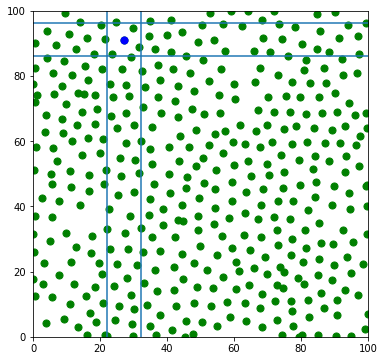

(1, 0, 1, array([281, 388, 399], dtype=int64))


In [8]:
plt.rcParams["figure.figsize"] = (6,6)

index = 1
t = 100
x1, y1, Phi1 = sim.get_data()

plt.scatter(x1[t], y1[t], c='g', marker='.',s=200)
plt.xlim((0,sim.width))
plt.ylim((0,sim.heigth))
plt.scatter(x1[t][index], y1[t][index], c='b', marker='.',s=200)

plt.axvline(x1[t][index]+5)
plt.axvline(x1[t][index]-5)
plt.axhline(y1[t][index]+5)
plt.axhline(y1[t][index]-5)
plt.show()

print(sim.check_neighbours(index, t))

Angle(rad) -24.670353873788564
neighbours (N,R,L) (4, 0, 4)


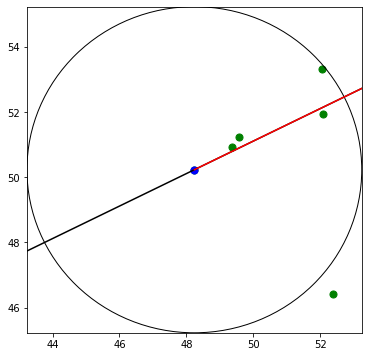

In [15]:
plt.rcParams["figure.figsize"] = (6,6)

index = 3
t = 10
x1, y1, Phi1 = sim.get_data()

x = x1[t][index]
y = y1[t][index]
angle = Phi1[t][index]

plt.scatter(x1[t], y1[t], c='g', marker='.',s=200)
plt.xlim((x - 5,x +5))
plt.ylim((y - 5,y + 5))
plt.scatter(x, y, c='b', marker='.',s=200)
#okrąg
draw_circle = plt.Circle((x, y), 5,fill=False)
plt.gcf().gca().add_artist(draw_circle)

X = np.linspace(x - 5,x +5, 100)
Y = np.tan(angle)*(X - x) + y

if np.cos(angle) > 0:
    X2 = np.linspace(x,x +5, 100)
elif np.cos(angle) < 0:
    X2 = np.linspace(x -5, x, 100)

Y2 = np.tan(angle)*(X2 - x) + y
plt.plot(X,Y,c="k")
plt.plot(X2,Y2,c="r")

print("Angle(rad)",angle)
print("neighbours (N,R,L)",sim.check_neighbours(index, t)[0:3])

plt.show()

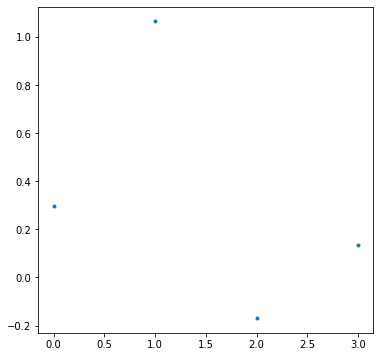

In [16]:
N,R,L,neighbours = sim.check_neighbours(index, t)

y_new = []
for i in neighbours:
    if (x1[t][i]-x)**2 + (y1[t][i]-y)**2 < 25:
        y_new.append(-np.sin(angle) * (x1[t][i] - x ) + np.cos(angle) * (y1[t][i] - y))

plt.plot(y_new, '.')

In [11]:
#color plot
def color_plot(t=0):
    plt.rcParams["figure.figsize"] = (12,12)


    index = 0

    color_indices_dict = sim.get_color_indices(t)

    #x1, y1, Phi1 = sim.get_data()
    x1, y1, Phi1 = sim.XT, sim.YT, sim.PhiT

    for item in color_indices_dict.items():
        color = item[0]
        indices = item[1]
        plt.scatter(x1[t][indices], y1[t][indices], c=color, marker='.',s=200)
    plt.xlim((0,sim.width))
    plt.ylim((0,sim.heigth))
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
interact(color_plot, t=(0,len(sim.XT)-1, 1))

interactive(children=(IntSlider(value=0, description='t', max=999), Output()), _dom_classes=('widget-interact'…

<function __main__.color_plot(t=0)>

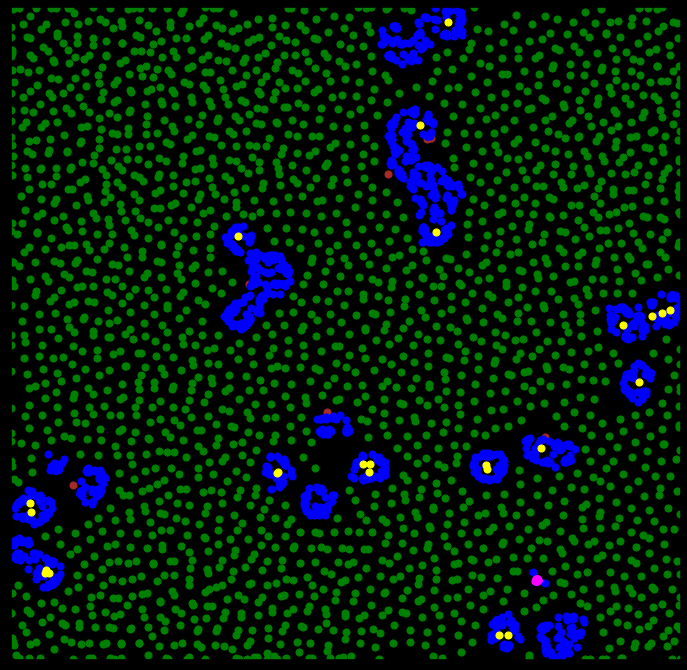

In [7]:
#gif
plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams.update({
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "black",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "black",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})
fig = plt.figure()
ax = plt.axes()
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
ax.set_xlim((0,sim.width))
ax.set_ylim((0,sim.heigth))

#x1, y1, Phi1 = sim.get_data()
x1, y1, Phi1 = sim.XT, sim.YT, sim.PhiT
camera = Camera(fig)
T = 1000
def anim(t):
    color_indices_dict = sim.get_color_indices(t)

    for item in color_indices_dict.items():
        color = item[0]
        indices = item[1]
        ax.scatter(x1[t][indices], y1[t][indices], c=color, marker='.',s=200)

for t in range(T):
    anim(t)
    camera.snap()

animacja = camera.animate(interval=100)
animacja.save('Animations/anim_test5.mp4' )

In [14]:
sim.get_color_indices(0, ["yellow"])

Warning: Invalid number of color names, should be 5. Proceeding with standard colors.